## Part 1. Preliminary data analysis

### 1.0 Data preparation

In [1]:
# Importing all required modules
# Disabling warnings
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

# Importing plotting modules and setting them up
import seaborn as sns

sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

%matplotlib inline
%config InlineBackend.sigure_format = 'retina'

In [2]:
# Tuning the visual settings for figures in 'seaborn' and 'matplotlib' in general
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (11, 8), "axes.titlesize": 18}
)


from matplotlib import rcParams
rcParams["figure.figsize"]= 11, 8

In [3]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [4]:
df = pd.read_csv(DATA_PATH+"mlbootcamp5_train.csv", sep=";")
print("Dataser size:",df.shape)
df.head()

Dataser size: (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
# Converting the data into long format
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"]
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0,1])
    .rename(columns={"value":"count"})
    .reset_index()
)
df_uniques

,variable,value,count
0,active,0,13739
1,active,1,56261
2,alco,0,66236
3,alco,1,3764
4,cardio,0,35021
5,cardio,1,34979
6,cholesterol,1,52385
7,cholesterol,2,9549
8,cholesterol,3,8066
9,gender,1,45530


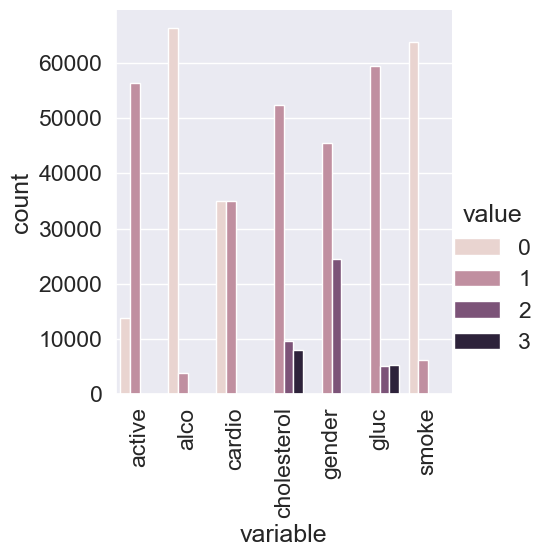

In [6]:
# Depicting the value counts of the categorical features
sns.catplot(
    data=df_uniques, x="variable", y="count", hue="value",  kind="bar"
)
plt.xticks(rotation="vertical");

In [7]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active"],
    id_vars=["cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable","value","cardio"])["value"].count())
    .sort_index(level=[0,1])
    .rename(columns={"value":"count"})
    .reset_index()
)
df_uniques

,variable,value,cardio,count
0,active,0,0,6378
1,active,0,1,7361
2,active,1,0,28643
3,active,1,1,27618
4,alco,0,0,33080
5,alco,0,1,33156
6,alco,1,0,1941
7,alco,1,1,1823
8,cholesterol,1,0,29330
9,cholesterol,1,1,23055


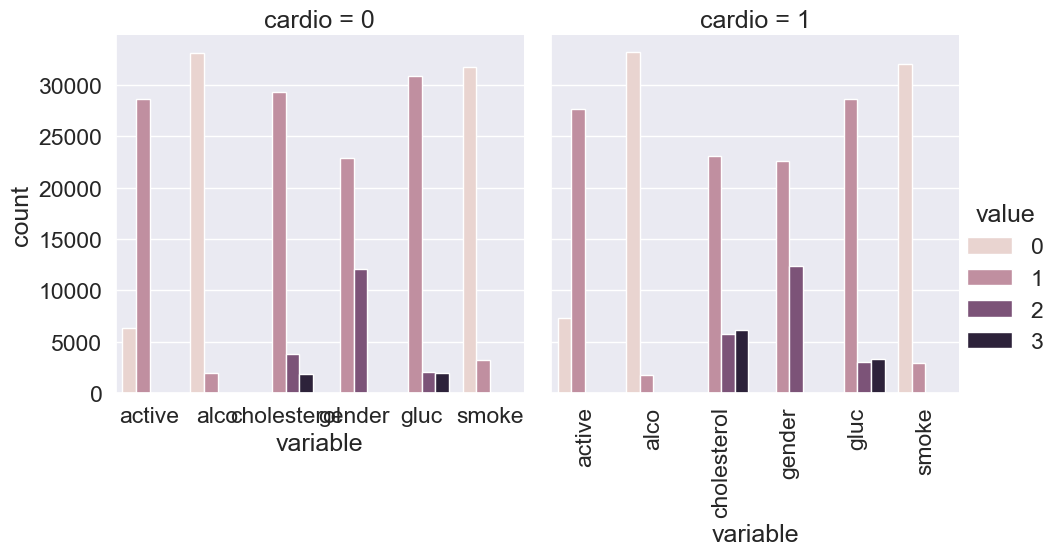

In [8]:
# Plotting the data
sns.catplot(
    x="variable",
    y="count",
    hue="value",
    col="cardio",
    data=df_uniques,
    kind="bar"
)
plt.xticks(rotation="vertical");

In [9]:
# Calculating some statistics for the feature unique values
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n<=3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * "-")

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


### 1.1 Basic observations

#### Question 1.1. (1 point). How many men and women are present in this dataset? Values of the gender feature were not given (whether “1” stands for women or for men) – figure this out by looking analyzing height, making the assumption that men are taller on average.

In [10]:
# Grouping by "gender" and calculating both the mean height and the count for each group
df_gender = df.groupby("gender").agg(
    average_height=("height", "mean"),
    count=("gender", "count")
).sort_values(by="average_height")

df_gender


,average_height,count
gender,,
1,161.355612,45530
2,169.947895,24470


In [11]:
# As dataframe is sorted we can identify women by index
women = df_gender.iloc[0]
print('There are',int(women['count']),'women in the dataset',
      'with an average height of',int(women["average_height"]))

There are 45530 women in the dataset with an average height of 161


In [12]:
# The output of the answer for men
men = df_gender.iloc[1]
print('There are',int(men['count']),'men in the dataset',
      'with an average height of',int(men["average_height"]))

There are 24470 men in the dataset with an average height of 169


In [13]:
# We save the named index of female and male gender fo further use
women_index = df_gender.index[0]
men_index = df_gender.index[1]

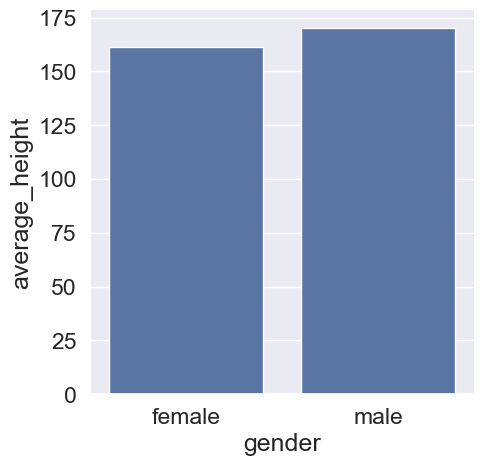

In [14]:
# We can now relabel the genders in our data for better data interpretation
df_gender_summary = df_gender.rename(index={men_index:"male", women_index:"female"})



# Visualization of the data
sns.catplot(
    data = df_gender_summary,
    x = "gender",
    y = "average_height",
    kind="bar"

);

#### Question 1.2. (1 point). Who more often report consuming alcohol – men or women?

In [15]:
# Formatting the data
gender_map = {men_index:"male", women_index:"female"}
df_labeled = df.copy()
df_labeled["gender"] = df_labeled["gender"].map(gender_map)
df_labeled

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,male,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,female,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,female,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,male,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,female,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,male,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,female,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,male,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,female,163,72.0,135,80,1,2,0,0,0,1


In [16]:

# Extracting the necessary data
df_alco_intake_by_gen = (
    pd.DataFrame(df_labeled[["gender", "alco"]]
    .groupby("gender")["alco"]
    .mean())
)


In [17]:
# Access the alcohol intake for each gender based on the `gender` column values
fem_intake = df_alco_intake_by_gen.loc["female"]["alco"].round(3)
mal_intake = df_alco_intake_by_gen.loc["male"]["alco"].round(3)

df_alco_intake_by_gen

,alco
gender,
female,0.025500
male,0.106375


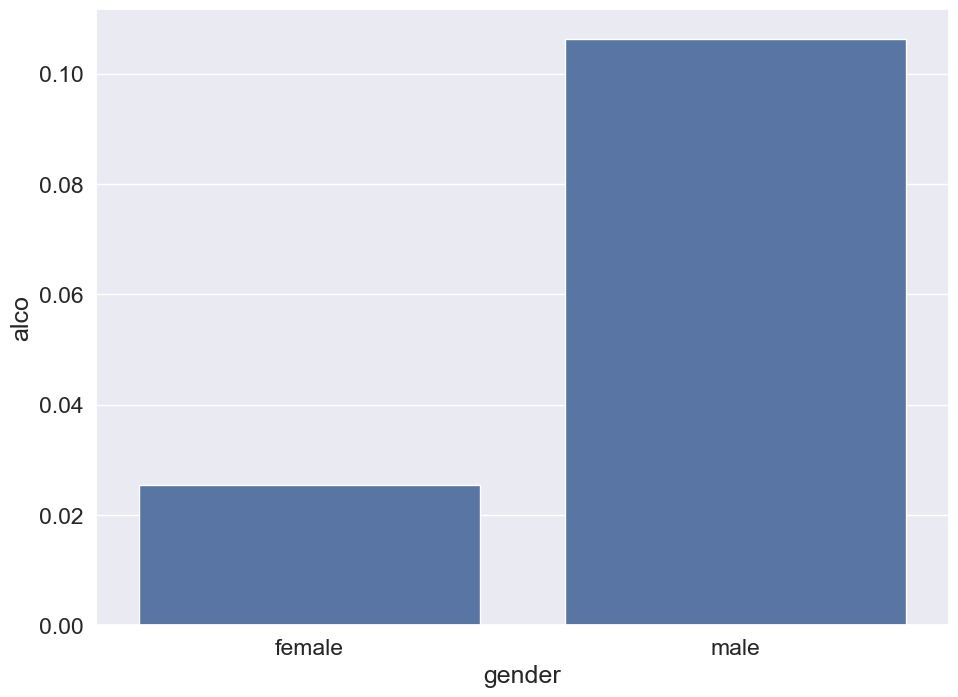

In [18]:
# Visualizing the data we got
sns.barplot(data=df_alco_intake_by_gen, x="gender", y="alco");

In [19]:
if mal_intake>fem_intake:
    print("Men report consuming alcohol more often")
elif fem_intake>mal_intake:
    print("Women report consuming alcohol more often")
else:
    print("Both genders report the same alcohol consumption")

Men report consuming alcohol more often


#### Question 1.3. (1 point). What’s the rounded difference between the percentages of smokers among men and women?

In [20]:
df_gendered_smokers = df_labeled.groupby("gender").agg(
    total = ("gender", "count"),
    smoke = ("smoke", "sum")
)

df_gendered_smokers

,total,smoke
gender,,
female,45530,813
male,24470,5356


In [21]:
percentages = df_gendered_smokers
df_gendered_smokers["smoke_percent"] = (df_gendered_smokers["smoke"]/df_gendered_smokers["total"])*100
df_gendered_smokers

,total,smoke,smoke_percent
gender,,,
female,45530,813,1.785636
male,24470,5356,21.888026


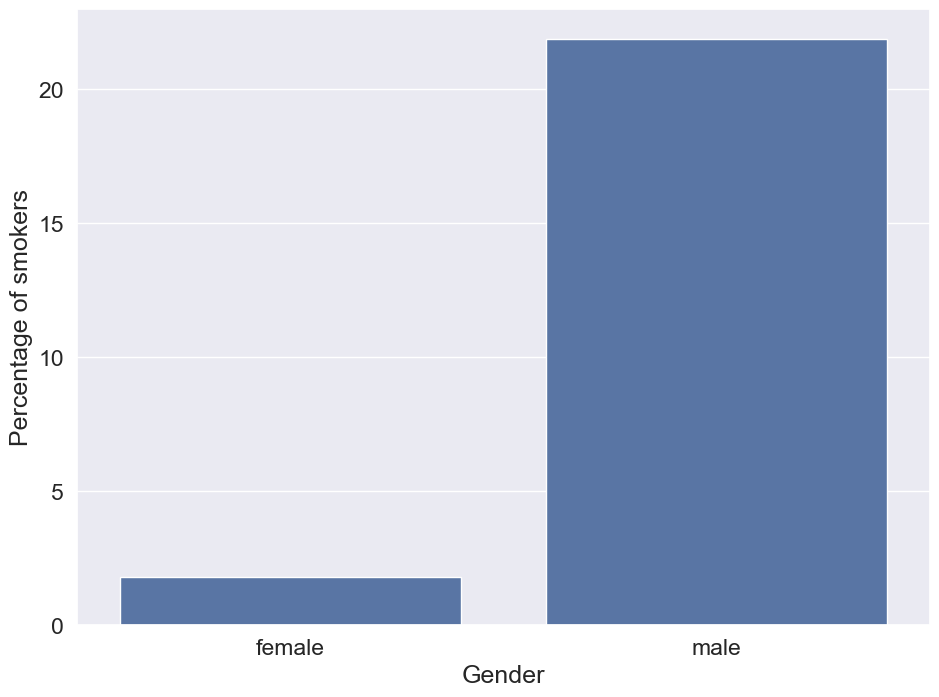

In [22]:
# Visualization for better interpretation
ax = sns.barplot(
    data = df_gendered_smokers,
    y = "smoke_percent",
    x = "gender"
)
ax.set(xlabel="Gender", ylabel="Percentage of smokers");

In [23]:
abs_diff = abs(df_gendered_smokers.loc["male",'smoke_percent'] - df_gendered_smokers.loc["female", 'smoke_percent']).round(0)

print("The rounded difference between the percentages of smokers among men and women is:",
abs_diff)

The rounded difference between the percentages of smokers among men and women is: 20.0


#### Question 1.4. (1 point). What’s the rounded difference between median values of age (in months) for non-smokers and smokers? You’ll need to figure out the units of feature age in this dataset.

In [24]:
df_smokers_by_age = pd.DataFrame(df.groupby("smoke")["age"].median())
age_diff_smoke = abs(df_smokers_by_age.loc[0,"age"]-df_smokers_by_age.loc[1,"age"])
age_diff_months =(age_diff_smoke/30).round()
print("The rounded difference between median values of age (in months) for non-smokers and smokers is",
age_diff_months)

The rounded difference between median values of age (in months) for non-smokers and smokers is 20.0


### 1.2. Risk maps

#### Question 1.5. (2 points). Calculate fractions of ill people (with CVD) in the two groups of people described in the task. What’s the ratio of these two fractions?

In [25]:
df_smoking_men = df_labeled[(df_labeled["gender"]=="male") & (df_labeled["smoke"]==1)]

# Creating a dataset which contains only smoking men
df_smoking_men

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
14,23,14532,male,181,95.0,130,90,1,1,1,1,1,0
19,29,21755,male,162,56.0,120,70,1,1,1,0,1,0
38,52,23388,male,162,72.0,130,80,1,1,1,0,1,1
58,73,15901,male,172,84.0,140,90,1,1,1,0,1,1
67,90,22099,male,171,97.0,150,100,3,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69950,99933,19137,male,167,74.0,130,80,1,1,1,1,1,0
69953,99936,17373,male,173,69.0,110,70,1,1,1,1,1,1
69957,99941,15536,male,166,90.0,120,80,1,1,1,0,1,0
69970,99958,22572,male,173,103.0,140,80,3,1,1,1,0,1


In [105]:
# Converting the data into a good format for further analysis
# Adding an age in years feature
df_smoking_men["age_years"] = df_smoking_men["age"]/365.25

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
14,23,14532,male,181,95.0,130,90,1,1,1,1,1,0,39.786448
19,29,21755,male,162,56.0,120,70,1,1,1,0,1,0,59.561944
38,52,23388,male,162,72.0,130,80,1,1,1,0,1,1,64.032854
58,73,15901,male,172,84.0,140,90,1,1,1,0,1,1,43.534565
67,90,22099,male,171,97.0,150,100,3,1,1,0,1,1,60.503765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69950,99933,19137,male,167,74.0,130,80,1,1,1,1,1,0,52.394251
69953,99936,17373,male,173,69.0,110,70,1,1,1,1,1,1,47.564682
69957,99941,15536,male,166,90.0,120,80,1,1,1,0,1,0,42.535250
69970,99958,22572,male,173,103.0,140,80,3,1,1,1,0,1,61.798768


In [27]:
df_risk_group = df_smoking_men[(df_smoking_men["age_years"]>=60) & (df_smoking_men["age_years"]<65)]
# Finding the subset of those with the lowest risk rates in a desired risk group
df_lower_risk = df_risk_group[(df_risk_group["ap_hi"]<120) & (df_risk_group["cholesterol"]==1)]

# Calculating the fraction of ill people in the desired group
lower_risk_fraction  = df_lower_risk[df_lower_risk["cardio"]==1]["id"].count()/df_lower_risk["id"].count()

print("Among the smoking men at the ages of 60-64 with low pressure and cholesterol levels",
"fraction of people with CVD is",lower_risk_fraction.round(2))

Among the smoking men at the ages of 60-64 with low pressure and cholesterol levels fraction of people with CVD is 0.28


In [28]:
df_risk_group = df_smoking_men[(df_smoking_men["age"]/365.25>=60) & (df_smoking_men["age"]/365.25<=64)]
# Finding the subset of those with the highest risk rates in a desired risk group
df_higher_risk = df_risk_group[(df_risk_group["ap_hi"]>=160) & (df_risk_group["cholesterol"]==3)]
df_higher_risk = df_higher_risk[(df_higher_risk["ap_hi"]<180)]

# Calculating the fraction of ill people in the desired group
higher_risk_fraction  = df_higher_risk[df_higher_risk["cardio"]==1]["id"].count()/df_higher_risk["id"].count()

print("Among the smoking men at the ages of 60-64 with high pressure and cholesterol levels",
"fraction of people with CVD is",higher_risk_fraction.round(2))

Among the smoking men at the ages of 60-64 with high pressure and cholesterol levels fraction of people with CVD is 0.93


In [29]:
total_ratio = higher_risk_fraction/lower_risk_fraction
print("We conclude that elevated blood pressure and high cholesterol levels",
"cause a",int(total_ratio.round()),"increase in the probability of falling ill to CVDs")

We conclude that elevated blood pressure and high cholesterol levels cause a 3 increase in the probability of falling ill to CVDs


### 1.3. Analyzing BMI

In [30]:
df_bmi = df_labeled.copy()
df_bmi["bmi"] = df_bmi["weight"]/(df["height"]*0.01)**2
df_bmi

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,18393,male,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,female,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,female,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,male,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,female,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,male,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,22601,female,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,19066,male,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,22431,female,163,72.0,135,80,1,2,0,0,0,1,27.099251


#### Question 1.6. (2 points). Choose the correct statements:

In [31]:
median_bmi = df_bmi["bmi"].median()
print("The median BMI in the sample is", round(median_bmi, 1),end=" ")
if 18.5<=median_bmi<=25:
    print("and is within bundaries of normal values")
else:
    print("and is out of boundaries of normal values")

The median BMI in the sample is 26.4 and is out of boundaries of normal values


In [32]:
women_avg_bmi = df_bmi[df_bmi["gender"]=="female"]["bmi"].mean()
men_avg_bmi = df_bmi[df_bmi["gender"]=="male"]["bmi"].mean()

print("The women's average BMI is:",round(women_avg_bmi,1))
print("The men's average BMI is:",round(men_avg_bmi,1))
print('We can see that the average BMI is higher for', end=" ")
if women_avg_bmi>men_avg_bmi:
    print("women")
else:
    print("men")

The women's average BMI is: 28.0
The men's average BMI is: 26.8
We can see that the average BMI is higher for women


In [33]:
df_healthy = df_bmi[df_bmi["cardio"]==0]
df_ill = df_bmi[df_bmi["cardio"]==1]
healthy_bmi = df_healthy["bmi"].median()
ill_bmi = df_ill["bmi"].median()
if ill_bmi>healthy_bmi:
    print("Ill", end=" ")
else:
    print("Healthy", end=" ")
print("people have higher BMI on average")

Ill people have higher BMI on average


In [34]:
healthy_wm_bmi = df_healthy[(df_healthy["gender"]=="female")&(df_healthy["alco"]==0)]["bmi"].mean()
healthy_m_bmi = df_healthy[(df_healthy["gender"]=="male")&(df_healthy["alco"]==0)]["bmi"].mean()

print("In the segment of healthy and non-drinking people", end=" ")
if healthy_wm_bmi>healthy_m_bmi:
    print("men", end="")
else:
    print("women", end="")
print("'s BMI is closer to the norm")

In the segment of healthy and non-drinking people men's BMI is closer to the norm


### 1.4. Cleaning data

In [35]:
# filtering out the entries with diastolic pressure is higher than systolic
df_clean = df[df["ap_hi"]>=df["ap_lo"]]
df_clean

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [36]:
# filtering out the entries with abnormal height 
height_2_5_percentile = df["height"].quantile(0.025)
height_97_5_percentile = df["height"].quantile(0.975)
df_clean = df_clean[(df_clean["height"]>=height_2_5_percentile) & (df_clean["height"]<=height_97_5_percentile)]
df_clean

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [37]:
# filtering out the entries with abnormal weight 
weight_2_5_percentile = df["weight"].quantile(0.025)
weight_97_5_percentile = df["weight"].quantile(0.975)
df_clean = df_clean[(df_clean["weight"]>=weight_2_5_percentile) & (df_clean["weight"]<=weight_97_5_percentile)]
df_clean

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


#### Question 1.7. (2 points). What percent of the original data (rounded) did we filter out in the previous step?

In [38]:
filtred_percent = df_clean["id"].count()/df_labeled["id"].count()*100
print("The percent of the original data we filtered out is :",
    100 - filtred_percent.round())

The percent of the original data we filtered out is : 10.0


## Part 2. Visual data analysis 

### 2.1. Correlation matrix visualization

#### Question 2.1. (1 point). Which pair of features has the strongest Pearson’s correlation with the gender feature?

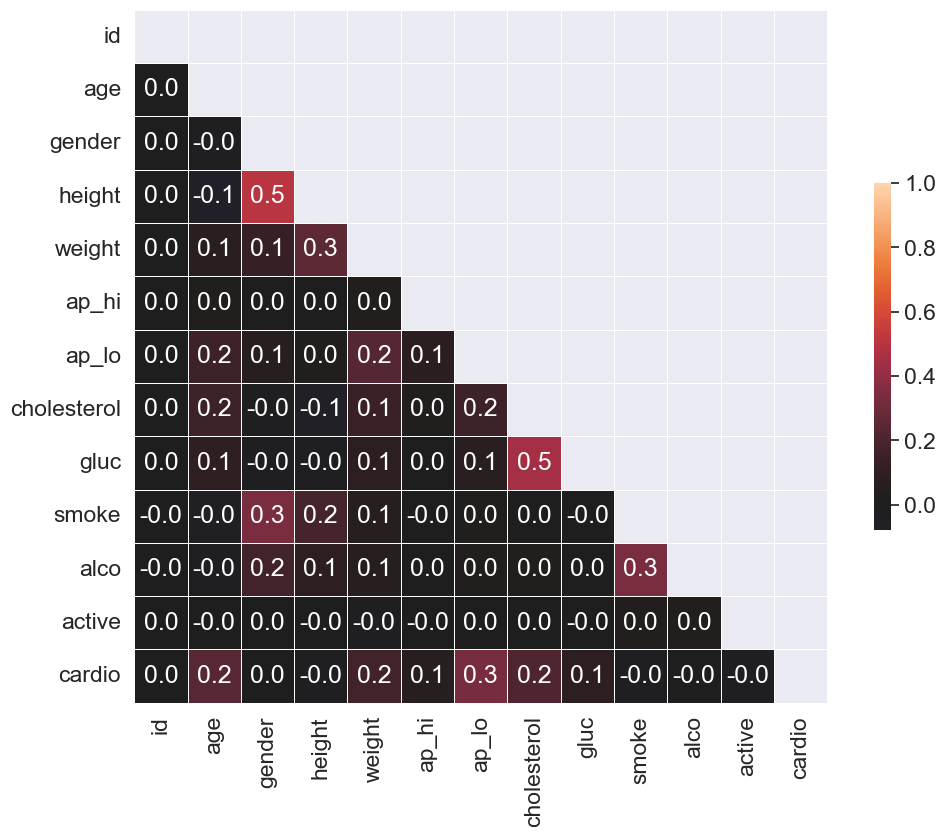

In [47]:
# Calculating and plotting
corr_matrix = df_clean.corr(method="pearson")

# Creating a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr_matrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

_, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(
    corr_matrix,
    mask=mask,
    vmax=1,
    center=0,
    annot=True,
    fmt=".1f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
);


### 2.2. Height distribution of men and women

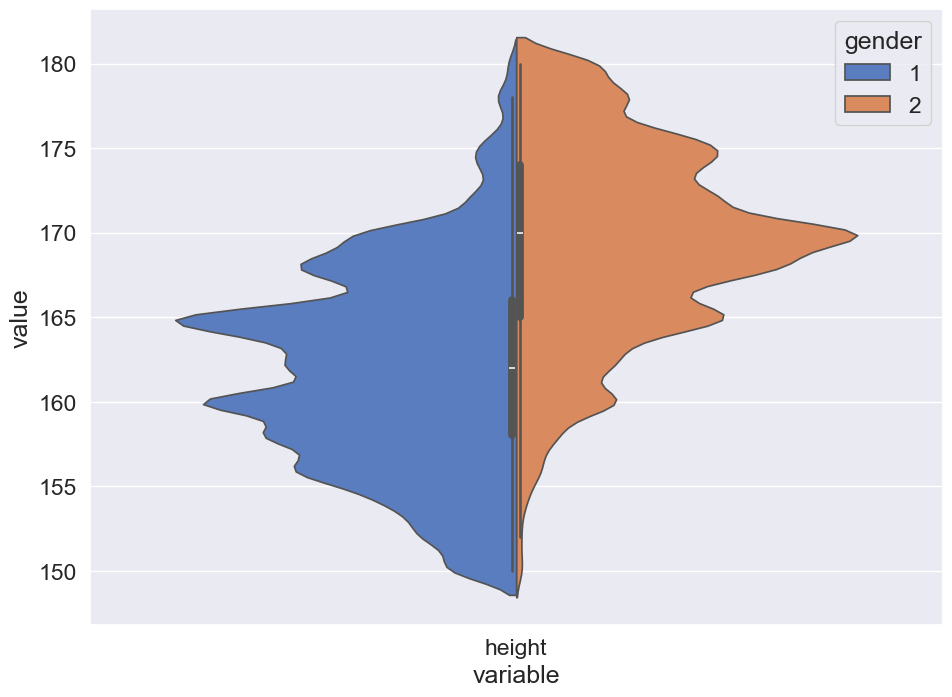

In [81]:
plt.figure()
df_clean_long = pd.melt(frame=df_clean, value_vars=["height"], id_vars=["gender"])
df_clean_long
ax = sns.violinplot(
    x="variable",
    y="value",
    hue="gender",
    palette="muted",
    split=True,
    data=df_clean_long,
    scale="count",
    scale_hue=False,
)

### 2.3. Rank correlation

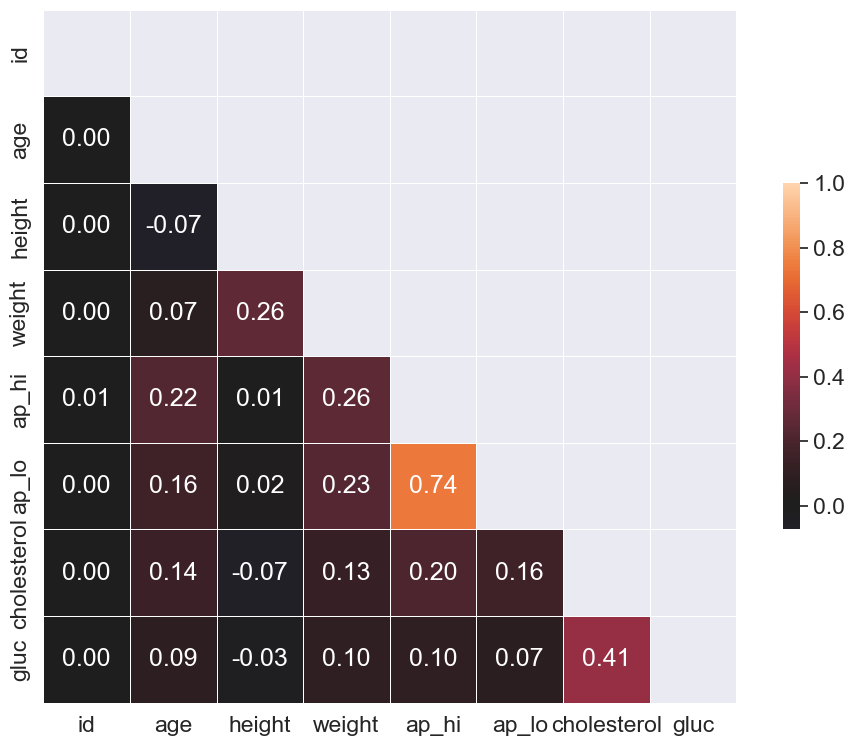

In [87]:
# Calculating the correlation matrix
corr = df_clean[
    ["id", "age", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc"]
].corr(method="spearman")

# Creating a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

_, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(
    corr,
    mask=mask,
    vmax=1,
    center=0,
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
);

### 2.4. Age

In [108]:
df_clean["age_years"] = ((df_clean["age"]/365.25).round()).astype(int)
sns.countplot(x="age_years", hue="cardio", data = df_clean);


AttributeError: 'float' object has no attribute 'round'